В цьому домашньому завданні відпрацюємо з вами знання, отримані в модулі зі статистики.

**Завдання 1.** Ми обговорили з Вами на лекції, що велика літера Сігма грецького алфавіту позначає в математиці суму. Знайдіть з використанням Python $\Sigma x$, $\Sigma x^2$, та $\Sigma (x-1)^2$ для наступного набору даних:
`1 3 4`
Виведіть результат кожного обчислення на екран.

In [13]:
x = [1, 3, 4]

sum_x = sum(x)
print(f"Сума х: {sum_x}")

sum_x_sqr = sum(el**2 for el in x)
print(f"Сума х**2: {sum_x_sqr}")

sum_x_minus_1_sqr = sum((el-1)**2 for el in x)
print(f"Сума (x-1)**2: {sum_x_minus_1_sqr}")

Сума х: 8
Сума х**2: 26
Сума (x-1)**2: 13


**Завдання 2.** Ми зібрали дані про суму покупок в гривнях 20ма випадково обраними клієнтами в нашому магазині (всього клієнтів у нас більше) за минулий місяць. Вони представлені в змінній `sum_purchases`. Знайдіть **вибіркове середнє** для цих даних кожним з зазначених методів:   

  2.1. без використання жодних бібліотек, користуючись тільки Python.  
  2.2. використовуючи відповідний метод бібліотеки `numpy`.

  Виведіть результат обчислень в кожному з випадків на екран та порівняйте результати. Вони співпадають?

In [45]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [31]:
#2.1.
mean_sum_purchases = sum(sum_purchases) / len(sum_purchases)
mean_sum_purchases

667.95

In [32]:
#2.2.
import numpy as np

print(np.mean(sum_purchases))

667.95


**Завдання 3.** Для того ж набору даних в змінній `sum_purchases` обчисліть **медіану** кожним з зазначених методів:  

  3.1. без використання жодних бібліотек, користуючись тільки Python.  
  3.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран. Порівняйте результати зі значенням вибіркового середнього. Напишіть коментар, для яких задач ви б використовували вибіркове середнє, а для яких - медіану?

In [61]:
#3.1.
sorted_sum_purchases = sorted(sum_purchases)
length = len(sorted_sum_purchases)

if length % 2 == 1:
  median_sum_purchases = sorted_sum_purchases[length // 2]
else:
  median_sum_purchases = (sorted_sum_purchases[length // 2 - 1] + sorted_sum_purchases[length // 2]) / 2

print(median_sum_purchases)

319.0


In [47]:
#3.2.
print(np.median(sum_purchases))

319.0


Між собою значення, вираховані вручну та за допомогою методів numpy рівні. Але бачимо, що медіана і середнє вибіркове значення вагомо відрізняються (медіана є менш чутливою до викидів).

Тому використання методу залежить від чистоти даних:
Середнє — коли дані чисті та симетричні.
Медіана — коли є викиди або розподіл асиметричний.

**Завдання 4**. Обчислість стандартне відхилення наведеної вибірки в змінній `sum_purchases` кожним з зазначених методів:  

  4.1. без використання жодних бібліотек, користуючись тільки Python.  
  4.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран.

In [64]:
#4.1.
std_dev_pur = (sum([(el-mean_sum_purchases)**2 for el in sum_purchases])/(length-1)) ** 0.5
std_dev_pur

1124.5433447451132

In [65]:
#4.2.
std_dev_np = np.std(sum_purchases, ddof=1)
std_dev_np

np.float64(1124.5433447451132)

**Завдання 5**. Ми провели дослідження віку студентів-першокурсників. Виявилось, що
- 10 студентів мають вік 16 років
- 25 студентів - 17 років
- 20 студентів - 18 років
- 2 студенти - 20 років

Обчислість середнє значення для цієї вибірки будь-яким способом - на чистому Python або з numpy - та виведіть результат на екран.

In [59]:
students_age = [16]*10 + [17]*25 + [18]*20 + [20]*2
(np.mean(students_age), sum(students_age)/57)

(np.float64(17.280701754385966), 17.280701754385966)

**Завдання 6**. Крім даних про суму покупок, ми зібрали ще дані про кількість відвідувань кожного з кожного покупця, які знаходяться в змінній `visits`. Обчисліть коефіцієнт кореляції Пірсона для суми покупок і кількості відвідувань кожним з зазначених методів:  

  6.1. без використання жодних бібліотек, користуючись тільки Python.  
  6.2. використовуючи відповідний метод бібліотеки numpy.  
  
Виведіть результат на екран. Проаналізуйте результат.

Виведіть додатково графік розсіювання викликавши код нижче і зробіть заключення, чи варто щось змінити при підрахунку кореляції, аби коефіцієнт Пірсона показував коректну оцінку лінійної залежності?

In [60]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

In [69]:
#6.1.
mean_visits = sum(visits)/len(visits)
cov_pur_vis = sum([(sum_purchases[i] - mean_sum_purchases)*(visits[i] - mean_visits) for i in range(length)]) / (length-1)
std_dev_vis = (sum([(el-mean_visits)**2 for el in visits])/(length-1)) ** 0.5

cov_pur_vis / (std_dev_pur * std_dev_vis)

-0.3026584468766646

In [67]:
#6.2.
np.corrcoef(sum_purchases, visits)

array([[ 1.        , -0.30265845],
       [-0.30265845,  1.        ]])

Коефіцієнт кореляції між цими змінними = -0.3 (слабковиражений негативний). Тобто є несильно виражений звязок - при збільшенні сум покупок дещо зменшується кількість візитів.

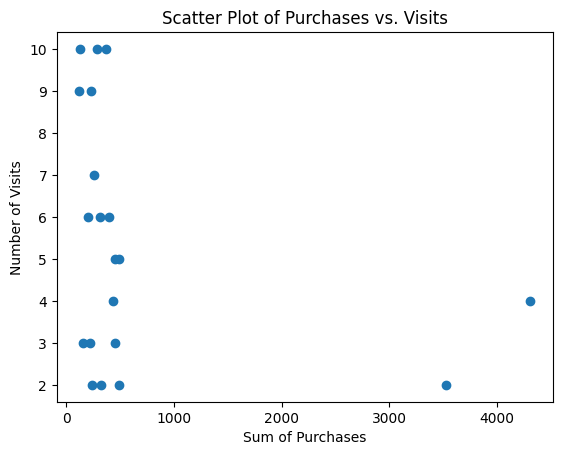

In [70]:
import matplotlib.pyplot as plt

plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

Візулізація цих двох змінних чітко показує наявність нетипових значень великих покупок, які можуть впливати на розрахунок коефіцієнта кореляції. Для більш точного розрахунку пропоную виключити пари значень викидів з обох вибірок або замінити ці викиди на середнє значення вибірки.

**Завдання 7**. В попередньому завданні ми помітили, що викиди нам заважають отримати "правдиве" значення кореляції. Давайте вилучимо записи, які відповідають значенням з викидами в сумі покупок і обчисліть коеф. кореляції. Для цього поставте `threshold`, який дорінює середньому значенню + 2 стандартних вдіхилля суми покупок і всі значення, які більше за нього, будемо вважати викидами (є і інші правила для визначення викидів - з ним и познайомимось пізніше).

Вилучіть значення з обох масивів і обчисліть коеф. кореляції Пірсона з допомогою `numpy` для кількості візитів і суми покупок без записів-викидів. Виведіть результат на екран, побудуйте діаграму розсіювання і проаналізуйте результат: що можемо сказати про залежність в даних?

In [74]:
threshold = mean_sum_purchases + 2 * std_dev_pur
sum_purchases_clear = []
visits_clear = []

for i in range (length):
  if sum_purchases[i] <= threshold:
    sum_purchases_clear.append(sum_purchases[i])
    visits_clear.append(visits[i])

np.corrcoef(sum_purchases_clear, visits_clear)


array([[ 1.        , -0.36852121],
       [-0.36852121,  1.        ]])

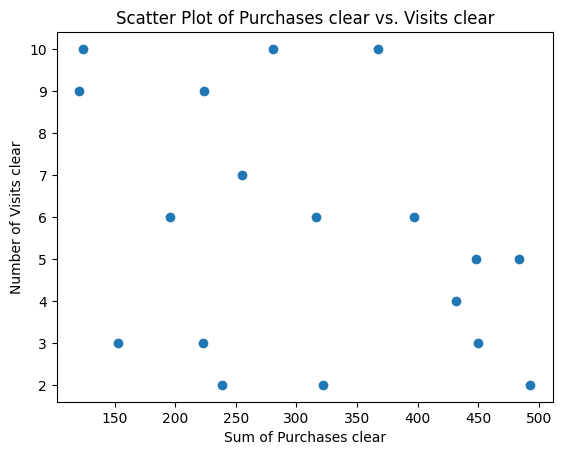

In [75]:
plt.scatter(sum_purchases_clear, visits_clear)
plt.title('Scatter Plot of Purchases clear vs. Visits clear')
plt.xlabel('Sum of Purchases clear')
plt.ylabel('Number of Visits clear');

При виключенні викидів з вибірки коефіцієнт кореляції Пірсона став більш вираженим негативним (з -0.3 до -0.36). Тобто очищення даних дало деяке покращення результатів. Але кореляція залишається незначною негативною
